In [1]:
from openpiv import tools, scaling, pyprocess, validation, filters
import numpy as np
import pylab
%matplotlib inline

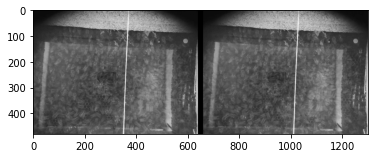

In [6]:
frame_a  = tools.imread( '../assets/image4.jpg' )
frame_b  = tools.imread( '../assets/image5.jpg' )
pylab.imshow(np.c_[frame_a,np.ones((frame_a.shape[0],20)),frame_b], cmap=pylab.cm.gray)

In [7]:
# Parameters 
window_size = 32 # pixels
overlap = 16 # 50% overlap
search_area_size = 32 # pixels
dt = 0.02 # second, 50 Hz, just an example
scaling_factor = 96.52 # micron/pixel

In [8]:
%%time
# default correlation
u, v, sig2noise = pyprocess.extended_search_area_piv( 
    frame_a, frame_b, 
    window_size=window_size, 
    overlap=overlap, 
    dt=dt, 
    search_area_size=search_area_size, 
    sig2noise_method='peak2peak' )
x, y = pyprocess.get_coordinates(frame_a.shape, 
                                 search_area_size=search_area_size, 
                                 overlap=overlap)

u, v, mask = validation.sig2noise_val( u, v, 
                                      sig2noise, 
                                      threshold = np.percentile(sig2noise,5))
u, v = filters.replace_outliers( u, v, method='localmean', 
                                max_iter=10, 
                                kernel_size=2)
x, y, u, v = scaling.uniform(x, y, u, v, 
                             scaling_factor=scaling_factor )
x, y, u, v = tools.transform_coordinates(x, y, u, v)
tools.save(x, y, u, v, mask, 'circular_default.txt' )

CPU times: user 430 ms, sys: 34.1 ms, total: 464 ms
Wall time: 531 ms


In [9]:
%%time
# normalized_correlation
u, v, sig2noise = pyprocess.extended_search_area_piv( 
    frame_a, frame_b, 
    window_size=window_size, 
    overlap=overlap, 
    dt=dt, 
    search_area_size=search_area_size, 
    sig2noise_method='peak2peak',
    normalized_correlation = True)
x, y = pyprocess.get_coordinates(frame_a.shape, 
                                 search_area_size=search_area_size, 
                                 overlap=overlap)
u, v, mask = validation.sig2noise_val( u, v, 
                                      sig2noise, 
                                      threshold = np.percentile(sig2noise,5))
u, v = filters.replace_outliers( u, v, method='localmean', 
                                max_iter=10, 
                                kernel_size=2)
x, y, u, v = scaling.uniform(x, y, u, v, 
                             scaling_factor=scaling_factor )
x, y, u, v = tools.transform_coordinates(x, y, u, v)
tools.save(x, y, u, v, mask, 'circular_normalized.txt' )

CPU times: user 436 ms, sys: 23.8 ms, total: 460 ms
Wall time: 479 ms


In [10]:
%%time
# linear correlation
u, v, sig2noise = pyprocess.extended_search_area_piv( 
    pyprocess.normalize_intensity(frame_a), 
    pyprocess.normalize_intensity(frame_b), 
    window_size=window_size, 
    overlap=overlap, 
    dt=dt, 
    search_area_size=search_area_size, 
    sig2noise_method='peak2peak',
    correlation_method = 'linear') 
x, y = pyprocess.get_coordinates(frame_a.shape, 
                                 search_area_size=search_area_size, 
                                 overlap=overlap)
u, v, mask = validation.sig2noise_val( u, v, 
                                      sig2noise, 
                                      threshold = np.percentile(sig2noise,5))
u, v = filters.replace_outliers( u, v, method='localmean', 
                                max_iter=10, 
                                kernel_size=2)
x, y, u, v = scaling.uniform(x, y, u, v, 
                             scaling_factor=scaling_factor )
x, y, u, v = tools.transform_coordinates(x, y, u, v)
tools.save(x, y, u, v, mask, 'linear_intensity.txt' )

CPU times: user 581 ms, sys: 65.8 ms, total: 646 ms
Wall time: 680 ms


In [11]:
%%time
# add normalized correlation to linear
u, v, sig2noise = pyprocess.extended_search_area_piv( 
    pyprocess.normalize_intensity(frame_a), 
    pyprocess.normalize_intensity(frame_b), 
    window_size=window_size, 
    overlap=overlap, 
    dt=dt, 
    search_area_size=search_area_size, 
    sig2noise_method='peak2peak',
    correlation_method='linear',
    normalized_correlation=True) 
x, y = pyprocess.get_coordinates(frame_a.shape, 
                                 search_area_size=search_area_size, 
                                 overlap=overlap)
u, v, mask = validation.sig2noise_val( u, v, 
                                      sig2noise, 
                                      threshold = np.percentile(sig2noise,5))
u, v = filters.replace_outliers( u, v, method='localmean', 
                                max_iter=10, 
                                kernel_size=2)
x, y, u, v = scaling.uniform(x, y, u, v, 
                             scaling_factor=scaling_factor )
x, y, u, v = tools.transform_coordinates(x, y, u, v)
tools.save(x, y, u, v, mask, 'linear_normalized.txt' )

CPU times: user 522 ms, sys: 24.9 ms, total: 547 ms
Wall time: 558 ms


In [12]:
%%time
# extended search_type
search_area_size = 40
u, v, sig2noise = pyprocess.extended_search_area_piv( 
    frame_a, 
    frame_b, 
    window_size=window_size, 
    overlap=overlap, 
    dt=dt, 
    search_area_size=search_area_size, 
    sig2noise_method='peak2peak',
    correlation_method='linear',
    normalized_correlation=True) 
x, y = pyprocess.get_coordinates(frame_a.shape, 
                                 search_area_size=search_area_size, 
                                 overlap=overlap)
u, v, mask = validation.sig2noise_val( u, v, 
                                      sig2noise, 
                                      threshold = np.percentile(sig2noise,5))
u, v = filters.replace_outliers( u, v, method='localmean', 
                                max_iter=10, 
                                kernel_size=2)
x, y, u, v = scaling.uniform(x, y, u, v, 
                             scaling_factor=scaling_factor )
x, y, u, v = tools.transform_coordinates(x, y, u, v)
tools.save(x, y, u, v, mask, 'linear_normalized_extended.txt' )

CPU times: user 430 ms, sys: 104 ms, total: 534 ms
Wall time: 572 ms


In [14]:
%%time

# circular extended
u, v, sig2noise = pyprocess.extended_search_area_piv( 
    frame_a, frame_b, 
    window_size=window_size, 
    overlap=overlap, 
    dt=dt, 
    search_area_size=search_area_size, 
    sig2noise_method='peak2peak' )
x, y = pyprocess.get_coordinates(frame_a.shape, 
                                 search_area_size=search_area_size, 
                                 overlap=overlap)
u, v, mask = validation.sig2noise_val( u, v, 
                                      sig2noise, 
                                      threshold = np.percentile(sig2noise,5))
u, v = filters.replace_outliers( u, v, method='localmean', 
                                max_iter=10, 
                                kernel_size=2)
x, y, u, v = scaling.uniform(x, y, u, v, 
                             scaling_factor=scaling_factor )
x, y, u, v = tools.transform_coordinates(x, y, u, v)
tools.save(x, y, u, v, mask, 'circular_extended.txt' )

CPU times: user 227 ms, sys: 39.8 ms, total: 267 ms
Wall time: 292 ms


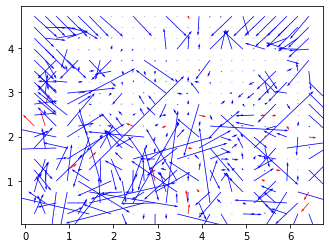

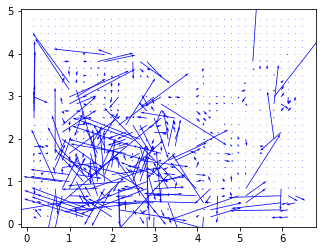

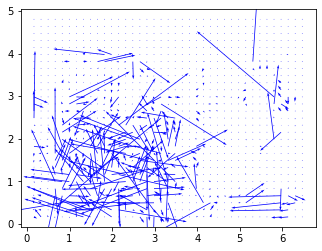

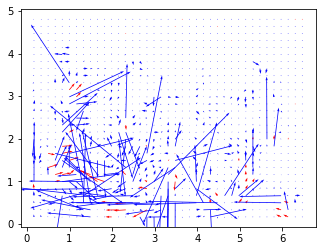

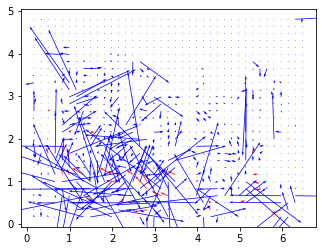

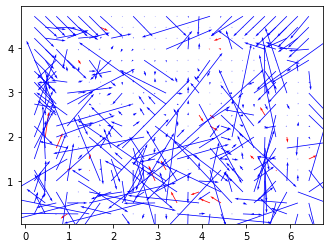

In [15]:
tools.display_vector_field('linear_normalized_extended.txt', scale=30)
tools.display_vector_field('linear_normalized.txt', scale=30)
tools.display_vector_field('linear_intensity.txt', scale=30)
tools.display_vector_field('circular_default.txt', scale=30);
tools.display_vector_field('circular_normalized.txt', scale=30);
tools.display_vector_field('circular_extended.txt', scale=30);